## Analyzing Faces with Artificial Intelligence / Cogntive Services

Materials from MSU Winter School **AI in Psychology 2020**.

Nowadays, in science, we can use data analysis to make conclusions and find relations. In this sample, we will analyze a series of photographs from events to make conclusions about people and their emotional state. This sample is rather a demonstration and should not be taken seriously, but doing similar research on more substantial dataset might be interesting.

### Cognitive Services for Image Analysis

A lot of content on the internet is in the form of images. Using [Microsoft Cognitive Services](http://aka.ms/coserv), we can extract a lot of useful intformation from images, such as:
 * For all people on the photo - age, gender, emotions, face accessories
 * A list of common objects on the photo
 * Context: indoors vs. outdoors photo
 * Dominant colours
 
In this sample, we will concentrate on extracting information about people using [Microsoft Azure Face API](https://docs.microsoft.com/azure/cognitive-services/face/overview/?wt.mc_id=psycho-events-dmitryso).

To use Face API, we need to provide a key and endpoint URL (because it is available in different regions, URL can be different). There are many ways to obtain Face API Key:

* If you have an Azure Subscription, the best option is to [create Cognitive Services resource](https://docs.microsoft.com/en-us/azure/cognitive-services/cognitive-services-apis-create-account/?wt.mc_id=crpyface-github-dmitryso), and grab key/url from there
* You can always [create free trial subscription](https://azure.microsoft.com/free/?wt.mc_id=crpyface-github-dmitryso) (you would need a credit card for that)
* If you do not have an Azure Subscription, you can try Face API for free - request your trial key [here](https://azure.microsoft.com/try/cognitive-services/my-apis/?api=face-api&wt.mc_id=crpyface-github-dmitryso).

**Important:** If you use trial key, your Face API will have some limitations, in terms of number of images you can process, and frequency of API calls (not more than 20 calls per minute). In order to make things work, we would need to insert some pauses in between calls, when using API on a series of images.

After you get the key and endpoint, please insert them into the cell below. There would typically be two keys given on the portal, you can use any one of them.

In [1]:
key = '--INSERT YOUR KEY HERE--'
endpoint = 'https://westus2.api.cognitive.microsoft.com' 
# You might need different endpoint, check the cognitive services page!

We also need to install Python Vision SDK to use Face API, as well as make sure other vital Python libraries are installed:

In [2]:
import sys
!{sys.executable} -m pip install --quiet --user matplotlib pandas ipyplot
!{sys.executable} -m pip install --quiet --user azure-cognitiveservices-vision-face
import os, matplotlib.pyplot as plt, json, pickle

You can call Face API using `cognitive_face` module, which we will abbreviate as `cf`:

In [3]:
import azure.cognitiveservices.vision.face as cf
from msrest.authentication import CognitiveServicesCredentials
cli = cf.FaceClient(endpoint,CognitiveServicesCredentials(key))

Main functions for face processing are `face.detect_with_url` and `face.detect_with_stream`. They extract different information from faces depending on parameters. For example, let's analyze the image below:
![](https://2016.dotnext-piter.ru/assets/images/people/soshnikov.jpg)

In [4]:
res = cli.face.detect_with_url('https://2016.dotnext-piter.ru/assets/images/people/soshnikov.jpg',
                               return_face_attributes=['emotion','age','gender'], return_face_id=False)
print(res[0].as_dict())

{'face_rectangle': {'width': 127, 'height': 127, 'left': 83, 'top': 87}, 'face_attributes': {'age': 39.0, 'gender': 'male', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}}}


### Analyzing photos from a conference

We will analyze photos from Psychology Summer Conference located [here](http://psy.msu.ru/science/conference/summer/2019/photo/index.html).
You can notice that all actual photos have the URL http://psy.msu.ru/science/conference/summer/2019/photo/xxx.jpg, where xxx is the photo number from 000 to 131.

In [6]:
urls = ["http://psy.msu.ru/science/conference/summer/2019/photo/{:03d}.jpg".format(i) for i in range(1,131)]

In [5]:
import pandas as pd
import ipyplot

In [7]:
ipyplot.plot_images(urls[::10],img_width=150)

In [8]:
data = []
for x in urls:
    print("Analyzing {} ...".format(x),end='')
    res = cli.face.detect_with_url(x, return_face_attributes=['emotion','age','gender'], return_face_id=False)
    nfaces = len(res)
    print(nfaces, ' faces')
    for t in res:
        fa = t.as_dict()['face_attributes']
        em = fa['emotion']
        z = { 'gender' : fa['gender'], 'age' : fa['age'], 'nfaces' : nfaces }
        data.append(dict(list(z.items())+list(em.items())))
print("Found {} faces".format(len(data)))

with open('data.json','w') as f:
    json.dump(data,f)

Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/001.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/002.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/003.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/004.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/005.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/006.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/007.jpg ...3  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/008.jpg ...3  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/009.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/010.jpg ...3  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/011.jpg ...4  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/

Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/099.jpg ...7  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/100.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/101.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/102.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/103.jpg ...5  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/104.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/105.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/106.jpg ...2  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/107.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/108.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/109.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/

In [10]:
df = pd.DataFrame(data)
df

,gender,age,nfaces,anger,contempt,disgust,fear,happiness,neutral,sadness,surprise
0,female,24.0,1,0.0,0.000,0.0,0.0,0.991,0.009,0.000,0.0
1,female,23.0,1,0.0,0.000,0.0,0.0,1.000,0.000,0.000,0.0
2,female,23.0,3,0.0,0.000,0.0,0.0,1.000,0.000,0.000,0.0
3,female,24.0,3,0.0,0.000,0.0,0.0,1.000,0.000,0.000,0.0
4,female,25.0,3,0.0,0.000,0.0,0.0,1.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
328,female,19.0,9,0.0,0.000,0.0,0.0,1.000,0.000,0.000,0.0
329,female,28.0,9,0.0,0.000,0.0,0.0,0.904,0.096,0.000,0.0
330,female,22.0,9,0.0,0.001,0.0,0.0,0.350,0.647,0.001,0.0
331,female,18.0,9,0.0,0.000,0.0,0.0,0.864,0.136,0.000,0.0


We have loaded all data into a `DataFrame` called `df`, and now we will try to analyze it visually. We can load the data from different source, and then come back to this point in the notebook to do the analysis.

We also can save the data to disk just in case

In [56]:
df.to_pickle('data_conf.pkl')

In [58]:
df = pd.read_pickle('data_conf.pkl')

## Analysing the Results Graphically

Let's start with the age distribution of people on photos:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAD23A1C88>]],
      dtype=object)

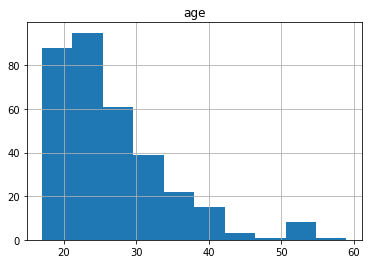

In [11]:
df.hist('age')

And what about happiness distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FBB183148>]],
      dtype=object)

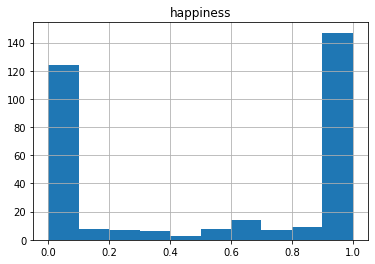

In [25]:
df.hist('happiness')

We can try to see if there is some relation between happiness and age:

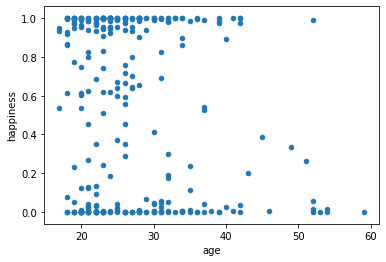

In [12]:
df.plot.scatter('age','happiness')

Let's see if happiness by any chance depends on gender:

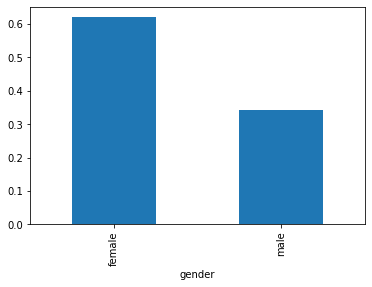

In [13]:
df.groupby('gender').mean()['happiness'].plot.bar()

**Conclusion:** females are almost twice happier than men!

Let's see if people are happier doing group photos:

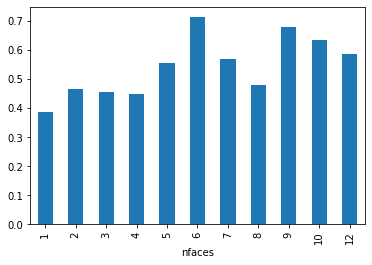

In [14]:
df.groupby('nfaces').mean()['happiness'].plot.bar()

**Conclusion:** It is more fun to do group photos, but not much more.

Finally, what about distribution by age:

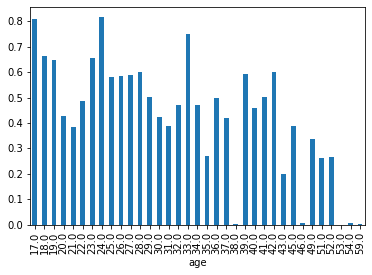

In [15]:
df.groupby('age').mean()['happiness'].plot.bar()

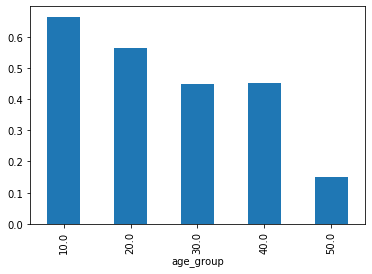

In [16]:
df['age_group'] = (df['age'] // 10)*10
df.groupby('age_group').mean()['happiness'].plot.bar()

If happiness decreases, are there any emotions that increase with age?

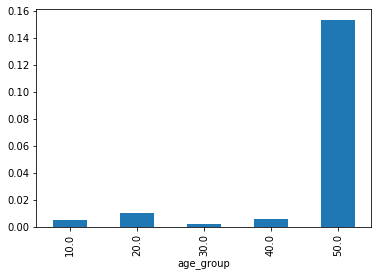

In [38]:
df.groupby('age_group').mean()['sadness'].plot.bar()

What about average emotions on pictures?

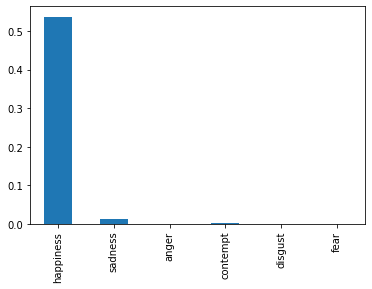

In [45]:
df.mean()[['happiness','sadness','anger','contempt','disgust','fear']].plot.bar()

And with the distribution by gender:

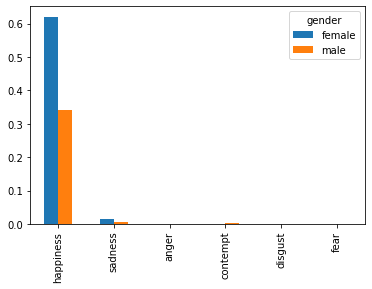

In [52]:
df.groupby('gender').mean()[['happiness','sadness','anger','contempt','disgust','fear']].T.plot.bar()

### Analysing our own pictures

We can put our own collection of photographs into `images` directory. Here I will download some pictures to get you started:

In [ ]:
!wget http://www.soshnikov.com/temp/psyimages.zip
!unzip psyimages.zip
!rm psyimages.zip

In [18]:
import PIL, glob, numpy as np

data = []
for fn in glob.glob("images/*"):
    print("Processing {}".format(fn),end=' ')
    with open(fn,'rb') as f:
        res = cli.face.detect_with_stream(f,return_face_landmarks=False,return_face_id=False,return_face_attributes=['emotion','age','gender'])
    nfaces = len(res)
    print(nfaces,' faces')
    im = PIL.Image.open(fn)
    img = np.array(im)
    for t in res:
        fa = t.as_dict()['face_attributes']
        em = fa['emotion']
        fr = t.as_dict()['face_rectangle']
        face = img[fr['top']:fr['top']+fr['height'],fr['left']:fr['left']+fr['width'],:]
        z = { 'gender' : fa['gender'], 'age' : fa['age'], 'nfaces' : nfaces, 'face' : face, 'img' : img  }
        data.append(dict(list(z.items())+list(em.items())))

print("Found {} faces".format(len(data)))


Processing images\IMG_0306.jpg 1  faces
Processing images\IMG_0521.jpg 3  faces
Processing images\IMG_0600.jpg 1  faces
Processing images\IMG_0781.jpg 3  faces
Processing images\IMG_0809.jpg 4  faces
Processing images\IMG_0872.jpg 4  faces
Processing images\IMG_0908.jpg 13  faces
Processing images\IMG_0923.jpg 7  faces
Processing images\IMG_0985.jpg 1  faces
Processing images\IMG_1018.jpg 5  faces
Processing images\IMG_1199.jpg 2  faces
Processing images\IMG_1241.jpg 2  faces
Processing images\IMG_1256.jpg 6  faces
Found 52 faces


In [26]:
df_full = pd.DataFrame(data)
df = df_full.drop(['img','face'],1)
df.to_pickle('data_faces.pkl')

Now we have again loaded data in the same format to a dataframe, and we can go back to **Analysing the Results Graphically** section to plot all the graphs.

Since we now have also extracted pictures themselves, we can see the most expressed emotions:

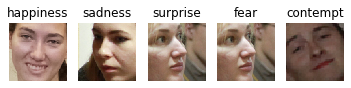

In [19]:
emotions = ['happiness','sadness','surprise','fear','contempt']
emos = { t:(0,None) for t in emotions}
for x in data:
    for k,v in emos.items():
        if x[k]>=v[0]:
            emos[k]=(x[k],x['face'])
fix,ax = plt.subplots(1,len(emos.keys()))
for i,e in enumerate(emos.keys()):
    if emos[e][1] is not None:
        ax[i].imshow(emos[e][1])
        ax[i].axis('off')
        ax[i].set_title(e)
plt.show()

It is interesting that emotions can be combined! Let's find the most "controversial" emotion, where two emotions are strongly expressed at the same time. To do this, we can look for the maximum of the second most expressed emotion:

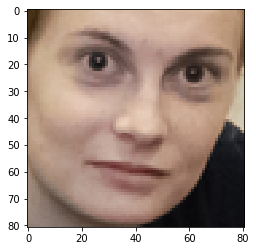

{'happiness': 0.087,
 'sadness': 0.0,
 'surprise': 0.057,
 'fear': 0.0,
 'contempt': 0.0}

In [20]:
mx = 0
img = None
emo = None
for x in data:
    em = { k: x[k] for k in emotions }
    snd = sorted(em.values())[-2]
    if snd>mx:
        mx = snd
        img = x['face']
        emo = em
plt.imshow(img)
plt.show()
emo

## Bringing Data Science to the Rescue

We can use data science methods to do something interesting. For example, let's see if there are some typical combinations of emotions that people express. To check it, we can use **clusterization** altogithm on vectors of emotions, which is implemented in *Scikit Learn* library:

In [23]:
import sklearn.cluster
inp = np.array([ [ x[e] for e in emotions ] for x in data])
centroid, labels, inertia = sklearn.cluster.k_means(inp,3)

We have clustered all possible emotion vectors into 3 clusters. The most representative emotion combinations are returned as  `centroids`, and we can find the closest faces to those centroids:

In [24]:
def closest_face(e):
    mi = 999
    el = None
    for i,x in enumerate(data):
        if np.linalg.norm(inp[i]-e)<mi:
            mi=np.linalg.norm(inp[i]-e)
            el=x
    return el['face']

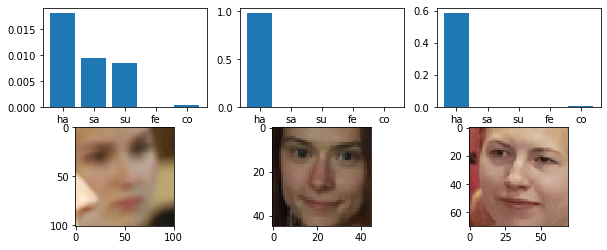

In [25]:
fig,ax = plt.subplots(2,len(centroid),figsize=(10,4))
for i,x in enumerate(centroid):
    ax[0,i].bar([t[0:2] for t in emotions],x)
    ax[1,i].imshow(closest_face(x))
plt.show()

We can see all faces in any cluster if we want to:

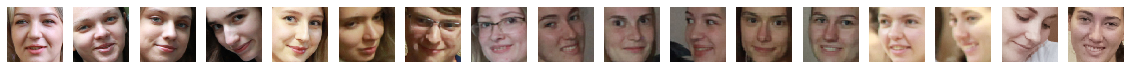

In [38]:
res = [x['face'] for x,i in zip(data,labels) if i==0]
fig,ax = plt.subplots(1,len(res),figsize=(20,4))
for i,x in enumerate(res):
    ax[i].imshow(x)
    ax[i].axis('off')
plt.show()

## Experiment!

You can always load new set of images into `images` directory and repeat this experiment on your own data, or use this notebook as a starting point to do deeper studies. I would love if you can share your results as a pull request to http://github.com/CloudAdvocacy/FaceStudies repository!

Contacts:
* Dmitry Soshnikov
* Cloud Developer Advocate, Microsoft
* Associate Professor, MIPT/HSE/MAI
* http://soshnikov.com
* http://t.me/shwars

In [1]:
!rm images/*